Data Loading:


In [1]:
import pandas as pd
import numpy as np

# Load the Happiness datasets
happiness_2016 = pd.read_csv('happiness_2016.csv')

# Display the first few rows to understand the structure of the data
print(happiness_2016.head())


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

Data Cleaning:


In [2]:
happiness_2016 = pd.read_csv('happiness_2016.csv')

# Check for missing values
missing_values = happiness_2016.isnull().sum()
print(missing_values)

# but in this dataset there are no missing values
happiness_2016_cleaned = happiness_2016.copy()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


Data Integration:


In [3]:
happiness_2017 = pd.read_csv('happiness_2017.csv')

# Merge the datasets on a common column (e.g., Country)
happiness_combined = pd.merge(happiness_2016_cleaned, happiness_2017, on='Country', suffixes=('_2016', '_2017'))

print(happiness_combined.head())


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)  Family_2016  Health (Life Expectancy)  \
0                   1.44178      1.16374                   0.79504   
1                   1.52733      1.14524                   0.86303   
2                   1.42666     

Variable Transformation:


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

happiness_2016_cleaned['Happiness Score'] = scaler.fit_transform(happiness_2016_cleaned[['Happiness Score']])

print(happiness_2016_cleaned.head())


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1         1.000000   
1  Switzerland  Western Europe               2         0.996321   
2      Iceland  Western Europe               3         0.994590   
3       Norway  Western Europe               4         0.993941   
4      Finland  Western Europe               5         0.975546   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

Dimensionality Reduction:

In [5]:
from sklearn.decomposition import PCA

numeric_columns = happiness_2016_cleaned.select_dtypes(include=[np.number])

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(numeric_columns)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

happiness_2016_with_pca = pd.concat([happiness_2016_cleaned.reset_index(drop=True), pca_df], axis=1)

print(happiness_2016_with_pca.head())


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1         1.000000   
1  Switzerland  Western Europe               2         0.996321   
2      Iceland  Western Europe               3         0.994590   
3       Norway  Western Europe               4         0.993941   
4      Finland  Western Europe               5         0.975546   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

Derivation of New Variables:

In [6]:
happiness_2016_cleaned['Economy_Health_Index'] = happiness_2016_cleaned['Economy (GDP per Capita)'] + happiness_2016_cleaned['Health (Life Expectancy)']

print(happiness_2016_cleaned.head())


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1         1.000000   
1  Switzerland  Western Europe               2         0.996321   
2      Iceland  Western Europe               3         0.994590   
3       Norway  Western Europe               4         0.993941   
4      Finland  Western Europe               5         0.975546   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

Data Visualisation: Pair plot

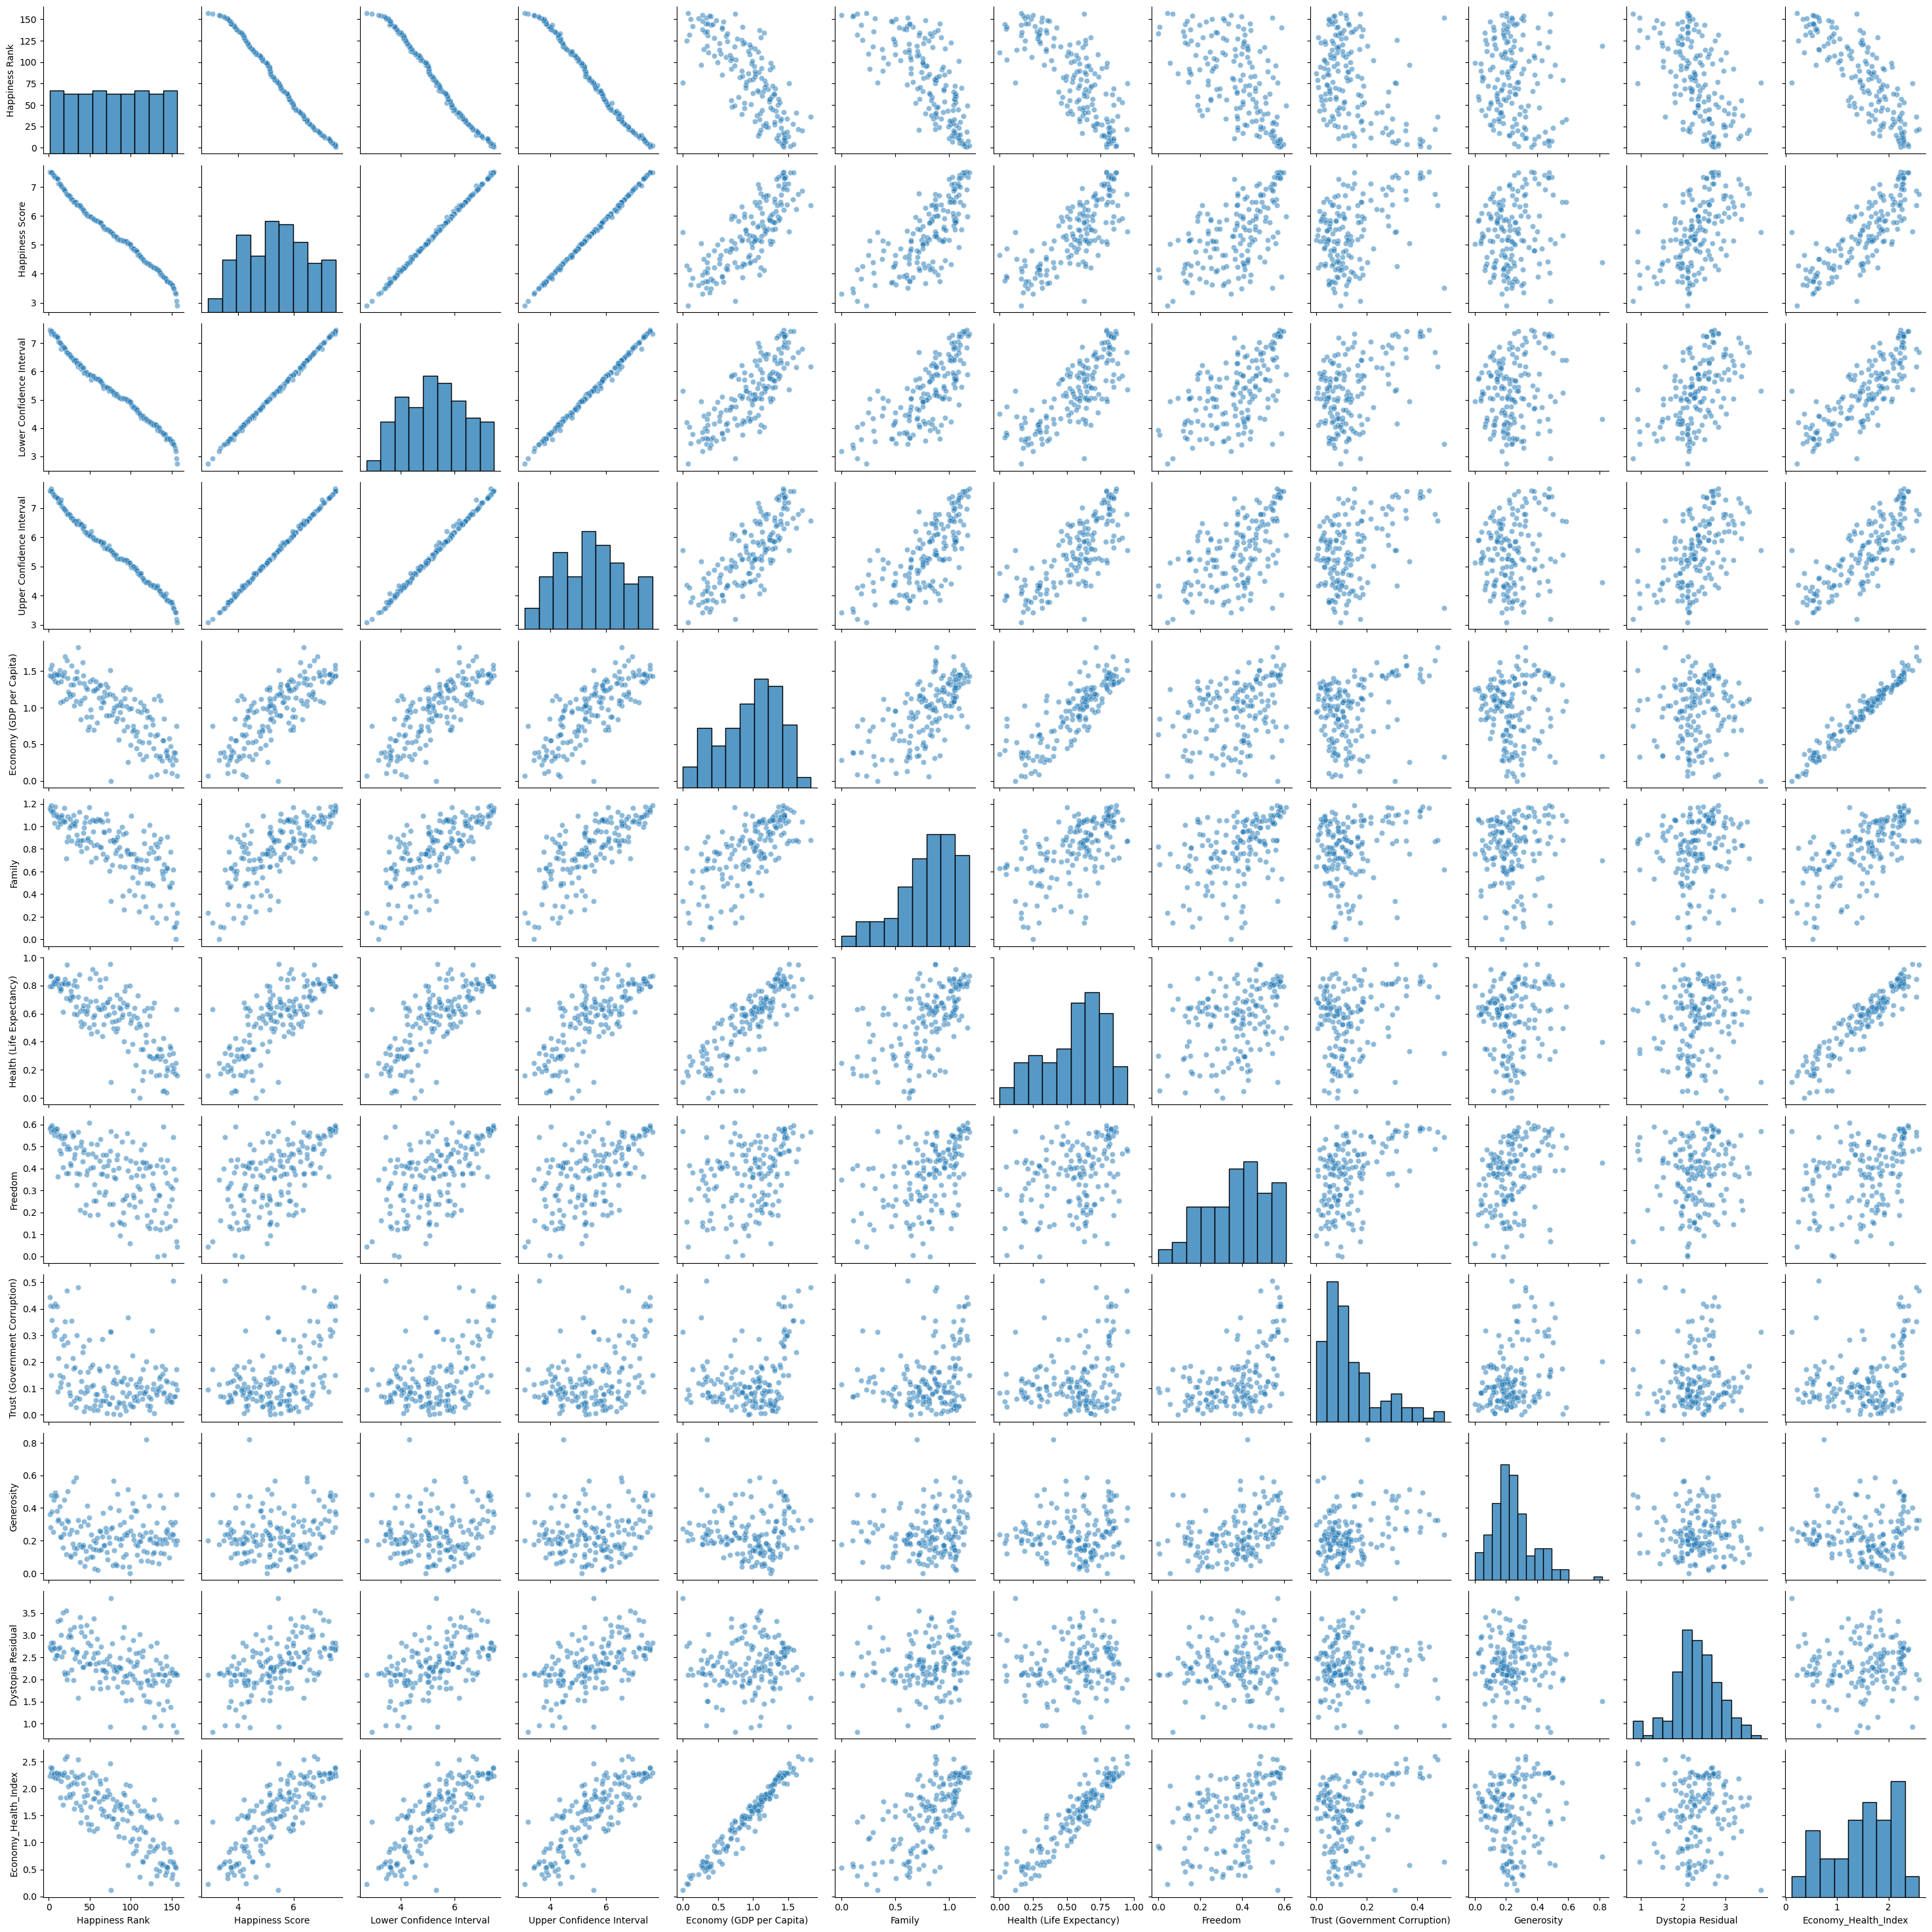

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


happiness_2016 = pd.read_csv('happiness_2016.csv')

happiness_2016_cleaned = happiness_2016.copy()

happiness_2016_cleaned['Economy_Health_Index'] = happiness_2016_cleaned['Economy (GDP per Capita)'] + happiness_2016_cleaned['Health (Life Expectancy)']

sns.pairplot(happiness_2016_cleaned, diag_kind='hist', plot_kws={'alpha':0.5})

plt.show()


Data Visualisation: Box plot

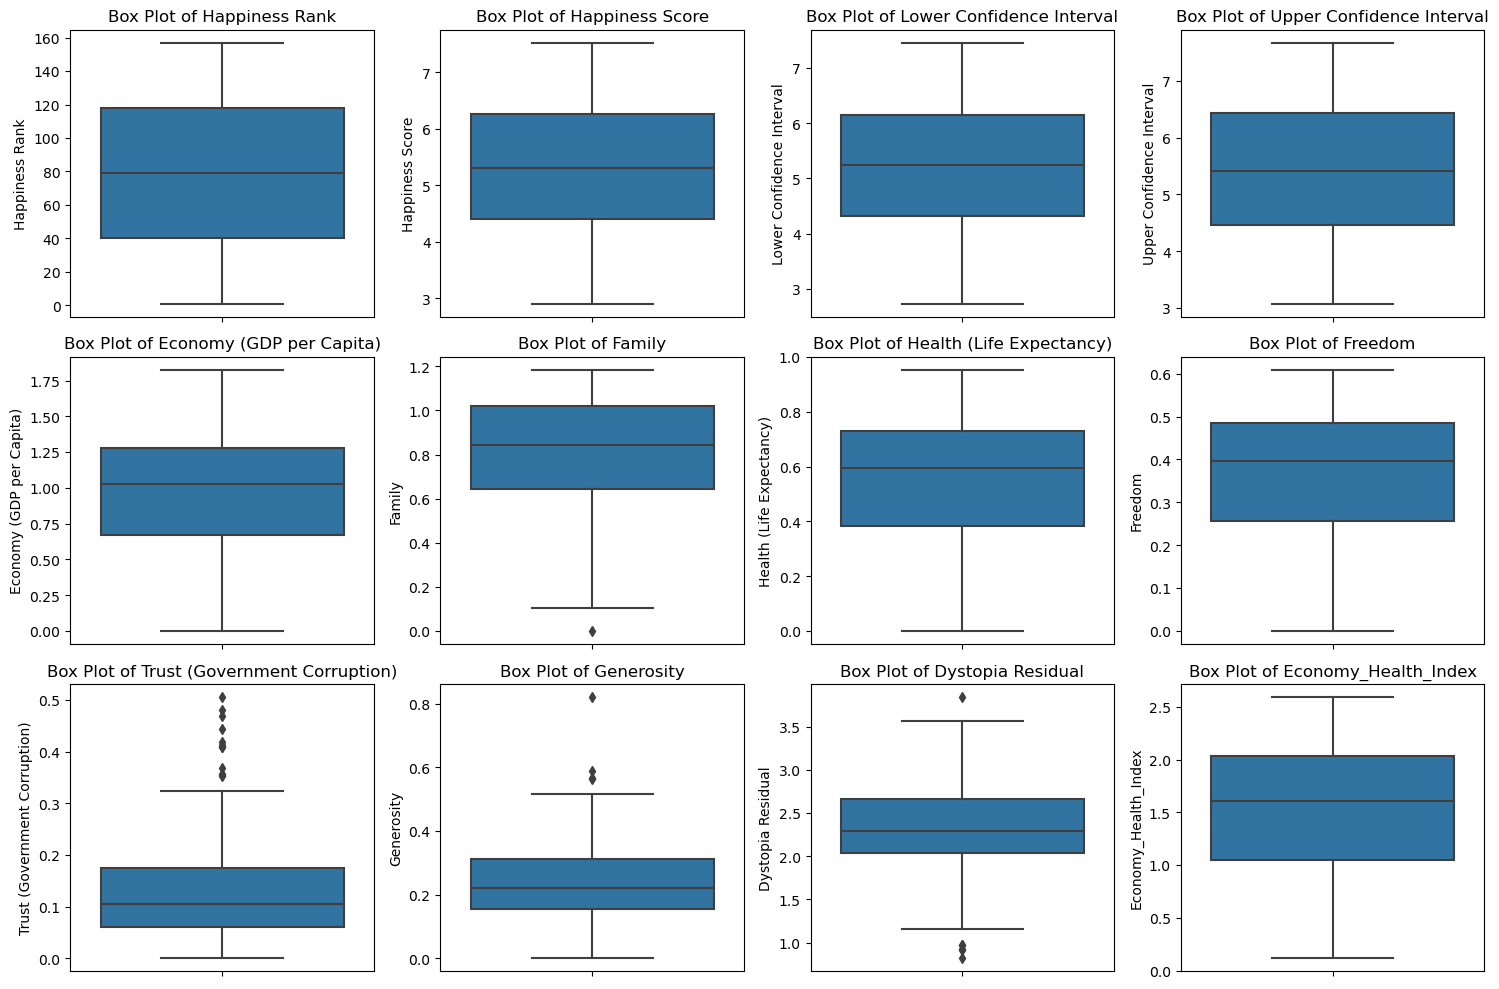

In [8]:

numeric_columns = happiness_2016_cleaned.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(3, 4, i)  # Adjust the subplot grid if necessary
    sns.boxplot(data=happiness_2016_cleaned, y=column)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()



Decision Tree: Correlation Matrix

C:\Users\USER\AppData\Local\Temp\ipykernel_26864\3324408683.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = happiness_2016_cleaned.corr()


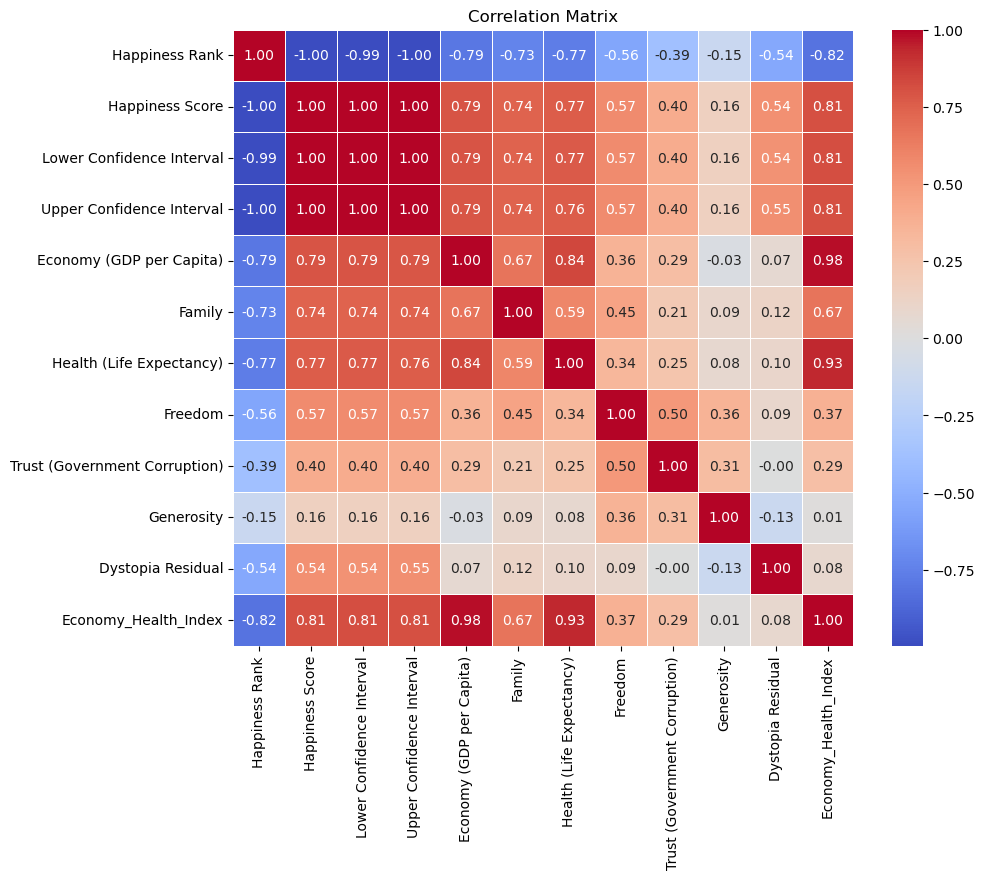

In [9]:
correlation_matrix = happiness_2016_cleaned.corr()

# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Decision tree: GridSearch

Data Preparation and splitting into x and y train

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

bins = [happiness_2016_cleaned['Happiness Score'].min(), 4.5, 6.0, happiness_2016_cleaned['Happiness Score'].max()]
labels = ['Low', 'Medium', 'High']
happiness_2016_cleaned['Happiness Category'] = pd.cut(happiness_2016_cleaned['Happiness Score'], bins=bins, labels=labels)

happiness_2016_cleaned = happiness_2016_cleaned.dropna(subset=['Happiness Category'])

X = happiness_2016_cleaned[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                            'Freedom', 'Trust (Government Corruption)', 'Generosity', 
                            'Dystopia Residual', 'Economy_Health_Index']]
y = happiness_2016_cleaned['Happiness Category']

print(X.isnull().sum())
print(y.isnull().sum())

y_binarized = label_binarize(y, classes=labels)

X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)


Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Economy_Health_Index             0
dtype: int64
0


Model Training and Evaluation Before Hyperparameter Tuning

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

accuracy_before_tuning = accuracy_score(y_test, y_pred)

print("Accuracy before Hyperparameter Tuning:", accuracy_before_tuning)


Accuracy before Hyperparameter Tuning: 0.75


Model Training and accuracy after Hyperparameter Tuning  

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

dtc = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_dtc = grid_search.best_estimator_

y_pred = best_dtc.predict(X_test)

accuracy_after_tuning = accuracy_score(y_test, y_pred)

print("Accuracy after Hyperparameter Tuning:", accuracy_after_tuning)


Accuracy after Hyperparameter Tuning: 0.78125


Evaluation and Visualization, including accuracy 

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Confusion Matrix:
[[ 4  2  0]
 [ 3 12  1]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

         Low       0.57      0.67      0.62         6
      Medium       0.80      0.75      0.77        16
        High       0.90      0.90      0.90        10

    accuracy                           0.78        32
   macro avg       0.76      0.77      0.76        32
weighted avg       0.79      0.78      0.78        32



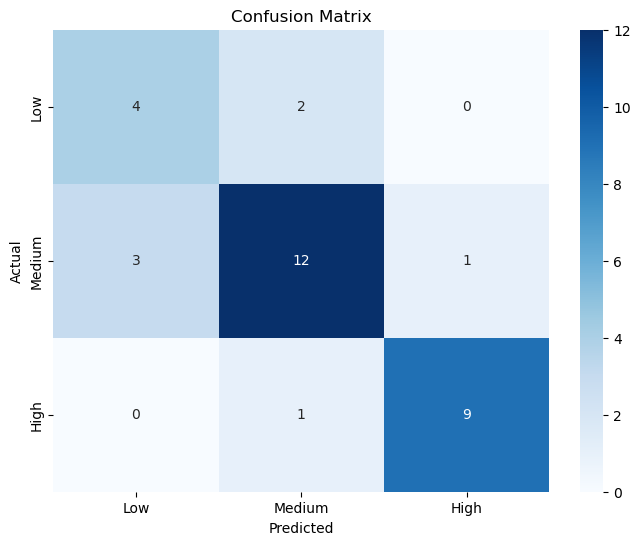

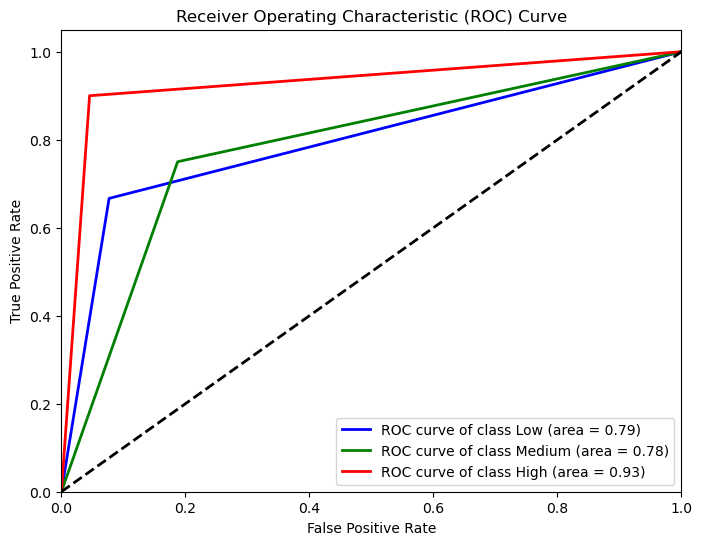

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
class_report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=labels)

print('Best Parameters:', grid_search.best_params_)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred[:, i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


KNN

Model Training and Evaluation Before Hyperparameter Tuning

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy_before_tuning = accuracy_score(y_test, y_pred)

print("Accuracy before Hyperparameter Tuning:", accuracy_before_tuning)


Accuracy before Hyperparameter Tuning: 0.8125


Hyperparameter Tuning with GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best Cross-Validation Score: 0.8873333333333333


Training KNN Model After Hyperparameter Tuning

In [16]:
from sklearn.metrics import accuracy_score

y_pred_tuned = best_knn.predict(X_test)

accuracy_after_tuning = accuracy_score(y_test, y_pred_tuned)

print("Accuracy after Hyperparameter Tuning:", accuracy_after_tuning)


Accuracy after Hyperparameter Tuning: 0.8125


Evaluation and Visualization

Confusion Matrix:
[[ 4  2  0]
 [ 3 13  0]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

         Low       0.57      0.67      0.62         6
      Medium       0.81      0.81      0.81        16
        High       1.00      0.90      0.95        10

    accuracy                           0.81        32
   macro avg       0.79      0.79      0.79        32
weighted avg       0.83      0.81      0.82        32



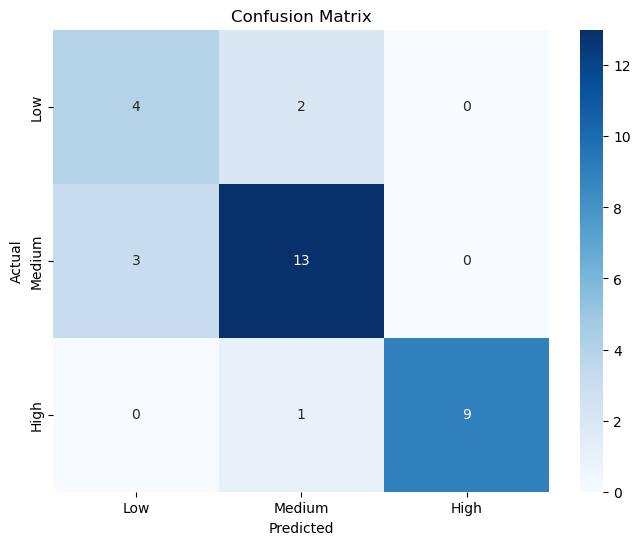

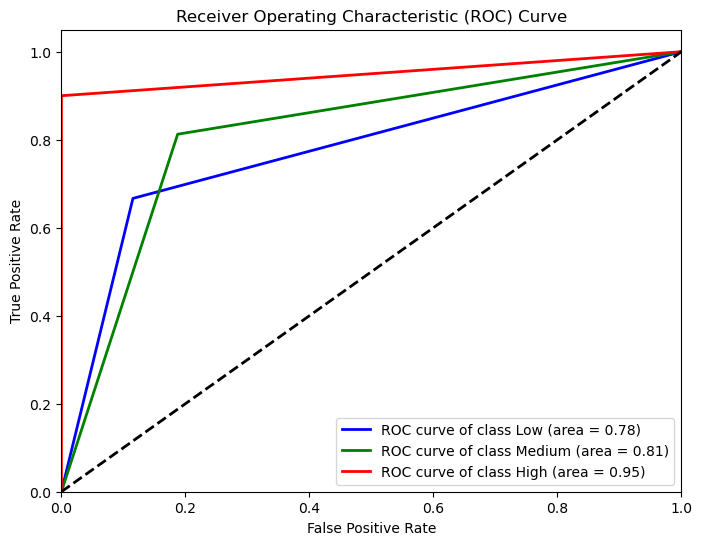

In [17]:

conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_tuned.argmax(axis=1))
class_report = classification_report(y_test.argmax(axis=1), y_pred_tuned.argmax(axis=1), target_names=labels)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_tuned[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_tuned[:, i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Naive Bayes with One-vs-Rest

Training Naive Bayes Model Before Hyperparameter Tuning

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

nb_model = OneVsRestClassifier(GaussianNB())
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy_before_tuning = accuracy_score(y_test, y_pred)

print("Accuracy before Hyperparameter Tuning:", accuracy_before_tuning)


Accuracy before Hyperparameter Tuning: 0.59375


Training Naive Bayes Model After Hyperparameter Tuning

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__var_smoothing': np.logspace(0, -9, num=100)  # GaussianNB specific parameter
}

grid_search = GridSearchCV(estimator=OneVsRestClassifier(GaussianNB()), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_nb = grid_search.best_estimator_


y_pred_tuned = best_nb.predict(X_test)

accuracy_after_tuning = accuracy_score(y_test, y_pred_tuned)

print("Accuracy after Hyperparameter Tuning:", accuracy_after_tuning)


Accuracy after Hyperparameter Tuning: 0.625


Evaluation and Visualization

Confusion Matrix:
[[ 6  0  0]
 [ 4 12  0]
 [ 0  4  6]]

Classification Report:
              precision    recall  f1-score   support

         Low       0.60      1.00      0.75         6
      Medium       0.75      0.75      0.75        16
        High       1.00      0.60      0.75        10

    accuracy                           0.75        32
   macro avg       0.78      0.78      0.75        32
weighted avg       0.80      0.75      0.75        32



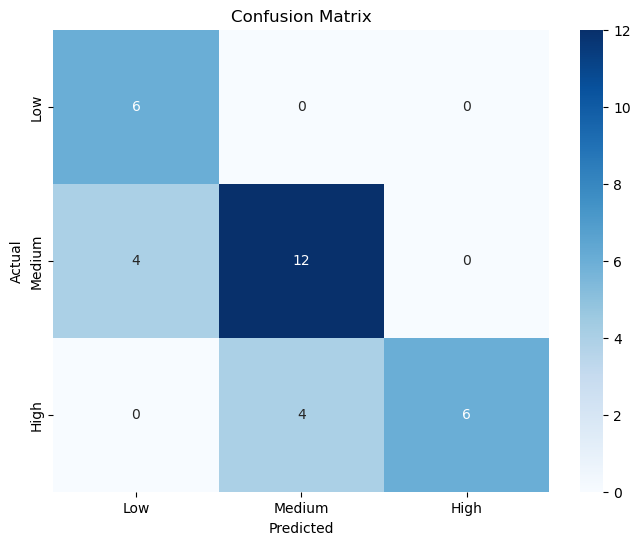

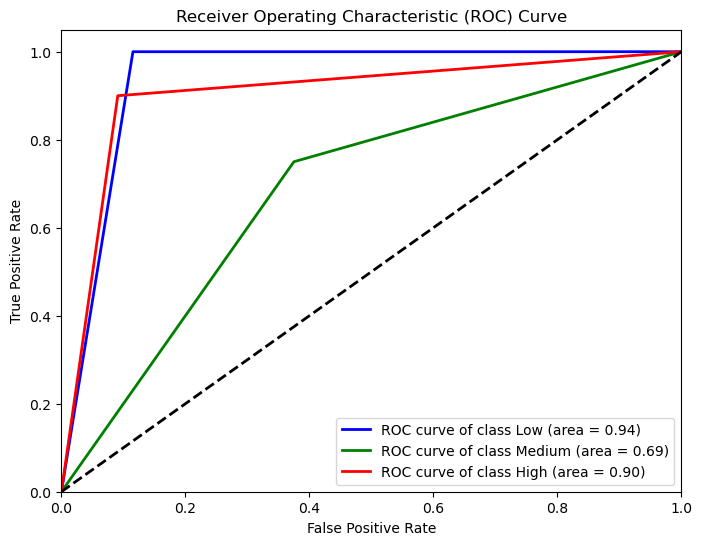

In [20]:

conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_tuned.argmax(axis=1))
class_report = classification_report(y_test.argmax(axis=1), y_pred_tuned.argmax(axis=1), target_names=labels)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_tuned[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_tuned[:, i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Q-learning in a Grid World

Data Preparation


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

happiness_2016 = pd.read_csv('happiness_2016.csv')

happiness_2016_cleaned = happiness_2016.copy()

happiness_2016_cleaned['Economy_Health_Index'] = happiness_2016_cleaned['Economy (GDP per Capita)'] + happiness_2016_cleaned['Health (Life Expectancy)']

happiness_2016_cleaned['GDP_Family_Index'] = happiness_2016_cleaned['Economy (GDP per Capita)'] + happiness_2016_cleaned['Family']
happiness_2016_cleaned['Freedom_Trust_Index'] = happiness_2016_cleaned['Freedom'] + happiness_2016_cleaned['Trust (Government Corruption)']

bins = [happiness_2016_cleaned['Happiness Score'].min(), 4.5, 6.0, happiness_2016_cleaned['Happiness Score'].max()]
labels = ['Low', 'Medium', 'High']
happiness_2016_cleaned['Happiness Category'] = pd.cut(happiness_2016_cleaned['Happiness Score'], bins=bins, labels=labels)

happiness_2016_cleaned = happiness_2016_cleaned.dropna(subset=['Happiness Category'])

X = happiness_2016_cleaned[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                            'Freedom', 'Trust (Government Corruption)', 'Generosity', 
                            'Dystopia Residual', 'Economy_Health_Index', 'GDP_Family_Index', 'Freedom_Trust_Index']]
y = happiness_2016_cleaned['Happiness Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

n_clusters = 30  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
state_labels_train = kmeans.fit_predict(X_train)
state_labels_test = kmeans.predict(X_test)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Simple Environment Definition


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


class SimpleEnv:
    def __init__(self, data, state_labels, true_labels):
        self.data = data
        self.state_labels = state_labels
        self.true_labels = pd.Series(true_labels).reset_index(drop=True)  
        self.n_states = np.unique(state_labels).size
        self.n_actions = data.shape[1]
        self.current_state_idx = 0
        self.current_state = state_labels[self.current_state_idx]
        self.observation_space = np.arange(self.n_states)
        self.action_space = np.arange(self.n_actions)
    
    def reset(self):
        self.current_state_idx = np.random.randint(0, len(self.state_labels))
        self.current_state = self.state_labels[self.current_state_idx]
        return self.current_state, {}
    
    def step(self, action):
        state_value = self.data[self.current_state_idx, int(action)] + np.random.normal(0, 0.5)
        reward = 0
        actual_class = self.true_labels.iloc[self.current_state_idx]

        if state_value > 0.5:
            if actual_class == 'High':
                reward = 3.0
            elif actual_class == 'Medium':
                reward = 2.0
            else:
                reward = 1.0
        else:
            reward = -0.5  

        self.current_state_idx = (self.current_state_idx + 1) % len(self.state_labels)
        self.current_state = self.state_labels[self.current_state_idx]
        done = self.current_state_idx == 0
        return self.current_state, reward, done, False, {}

def decay_epsilon(episode: int, max_epsilon: float = 1.0, min_epsilon: float = 0.1, decay_rate: float = 0.00005) -> float:
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    return epsilon


Q-learning Algorithm


In [23]:
def Q_learning(env: SimpleEnv, step_size: float = 0.8, episodes: int = 20000, gamma: float = 0.9, success_threshold: float = 2.0) -> np.ndarray:
    Q = np.zeros([env.n_states, env.n_actions])
    epsilon = 1.0  
    success_episodes = 0

    for i in range(episodes):
        state, _ = env.reset()  
        total_R = 0 

        while True: 
            if np.random.uniform(0, 1) < epsilon:
                action = np.random.randint(0, env.n_actions)
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, truncated, _ = env.step(action)
            total_R += reward

            Q[state][action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            state = next_state

            if done or truncated:
                break

        if total_R >= success_threshold:
            success_episodes += 1

        epsilon = decay_epsilon(i)

        if (i + 1) % 1000 == 0 or i == episodes - 1:
            print(f"Episode {i + 1}: || Total Reward: {total_R:.2f} || e-greedy: {epsilon:.2f} || Success Rate: {success_episodes}/{i + 1}")

    return Q


Policy Determination


In [24]:
def determine_policy_from_Q(Q: np.ndarray) -> np.ndarray:
    policy = np.zeros(Q.shape[0], dtype=int)
    for s in range(Q.shape[0]):
        policy[s] = np.argmax(Q[s])
    return policy

def test_policy(env, policy, success_threshold: float = 2.0, runs=100):
    total_reward = 0
    success_count = 0
    y_true = []
    y_scores = []
    all_rewards = []  
    for _ in range(runs):
        state, _ = env.reset()
        run_reward = 0
        while True:
            action = policy[state]
            next_state, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            run_reward += reward
            y_true.append(env.true_labels.iloc[env.current_state_idx])
            y_scores.append(reward) 
            state = next_state
            if done:
                break
        all_rewards.append(run_reward)
        if run_reward >= success_threshold:
            success_count += 1
    return total_reward / runs, success_count / runs, y_true, y_scores, all_rewards


Main Execution and Evaluation and displaying accuracy before and after hyperparameter tuning


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix


if __name__ == "__main__":
    SUCCESS_REWARD = 2.0  
    env_train = SimpleEnv(X_train, state_labels_train, y_train)
    env_test = SimpleEnv(X_test, state_labels_test, y_test)

    Q_before = Q_learning(env_train, step_size=0.8, episodes=10000, gamma=0.9, success_threshold=SUCCESS_REWARD)
    opt_p_before = determine_policy_from_Q(Q_before)
    avg_reward_before, success_rate_before, y_true_before, y_scores_before, all_rewards_before = test_policy(env_test, opt_p_before, success_threshold=SUCCESS_REWARD)
    accuracy_before = accuracy_score([1 if label == 'High' else 0 for label in y_true_before], [1 if score > 1.0 else 0 for score in y_scores_before])
    print(f"Before Hyperparameter Tuning - Average Reward: {avg_reward_before:.2f}, Success Rate: {success_rate_before * 100:.2f}%, Accuracy: {accuracy_before * 100:.2f}%")

    Q_after = Q_learning(env_train, step_size=2.8, episodes=20000, gamma=0.99, success_threshold=SUCCESS_REWARD)
    opt_p_after = determine_policy_from_Q(Q_after)
    avg_reward_after, success_rate_after, y_true_after, y_scores_after, all_rewards_after = test_policy(env_test, opt_p_after, success_threshold=SUCCESS_REWARD)
    accuracy_after = accuracy_score([1 if label == 'High' else 0 for label in y_true_after], [1 if score > 1.0 else 0 for score in y_scores_after])
    print(f"After Hyperparameter Tuning - Average Reward: {avg_reward_after:.2f}, Success Rate: {success_rate_after * 100:.2f}%, Accuracy: {accuracy_after * 100:.2f}%")



Episode 1000: || Total Reward: 20.00 || e-greedy: 0.96 || Success Rate: 943/1000
Episode 2000: || Total Reward: 44.00 || e-greedy: 0.91 || Success Rate: 1885/2000
Episode 3000: || Total Reward: 77.50 || e-greedy: 0.87 || Success Rate: 2815/3000
Episode 4000: || Total Reward: 63.50 || e-greedy: 0.84 || Success Rate: 3765/4000
Episode 5000: || Total Reward: 53.00 || e-greedy: 0.80 || Success Rate: 4716/5000
Episode 6000: || Total Reward: 69.00 || e-greedy: 0.77 || Success Rate: 5659/6000
Episode 7000: || Total Reward: 7.50 || e-greedy: 0.73 || Success Rate: 6588/7000
Episode 8000: || Total Reward: 57.50 || e-greedy: 0.70 || Success Rate: 7527/8000
Episode 9000: || Total Reward: 70.00 || e-greedy: 0.67 || Success Rate: 8473/9000
Episode 10000: || Total Reward: 70.50 || e-greedy: 0.65 || Success Rate: 9418/10000
Before Hyperparameter Tuning - Average Reward: 12.34, Success Rate: 78.00%, Accuracy: 53.61%


C:\Users\USER\AppData\Local\Temp\ipykernel_26864\4039033135.py:19: RuntimeWarning: overflow encountered in scalar multiply
  Q[state][action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
C:\Users\USER\AppData\Local\Temp\ipykernel_26864\4039033135.py:19: RuntimeWarning: invalid value encountered in scalar add
  Q[state][action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
C:\Users\USER\AppData\Local\Temp\ipykernel_26864\4039033135.py:19: RuntimeWarning: invalid value encountered in scalar subtract
  Q[state][action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state][action])


Episode 1000: || Total Reward: 42.50 || e-greedy: 0.96 || Success Rate: 919/1000
Episode 2000: || Total Reward: 65.50 || e-greedy: 0.91 || Success Rate: 1852/2000
Episode 3000: || Total Reward: 25.00 || e-greedy: 0.87 || Success Rate: 2791/3000
Episode 4000: || Total Reward: 23.00 || e-greedy: 0.84 || Success Rate: 3714/4000
Episode 5000: || Total Reward: 3.00 || e-greedy: 0.80 || Success Rate: 4654/5000
Episode 6000: || Total Reward: 34.50 || e-greedy: 0.77 || Success Rate: 5582/6000
Episode 7000: || Total Reward: 13.00 || e-greedy: 0.73 || Success Rate: 6522/7000
Episode 8000: || Total Reward: 41.00 || e-greedy: 0.70 || Success Rate: 7460/8000
Episode 9000: || Total Reward: 43.50 || e-greedy: 0.67 || Success Rate: 8391/9000
Episode 10000: || Total Reward: 36.50 || e-greedy: 0.65 || Success Rate: 9344/10000
Episode 11000: || Total Reward: 30.50 || e-greedy: 0.62 || Success Rate: 10293/11000
Episode 12000: || Total Reward: 80.50 || e-greedy: 0.59 || Success Rate: 11228/12000
Episode 13

Confusion matrix, ROC Curve and Learning Curve

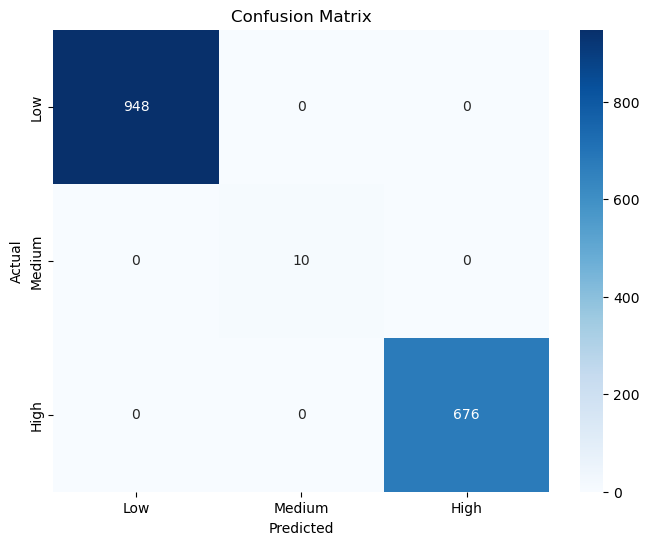

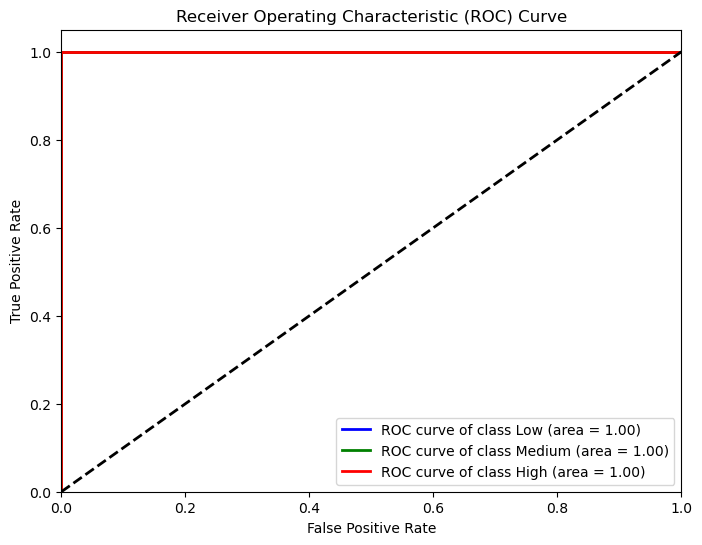

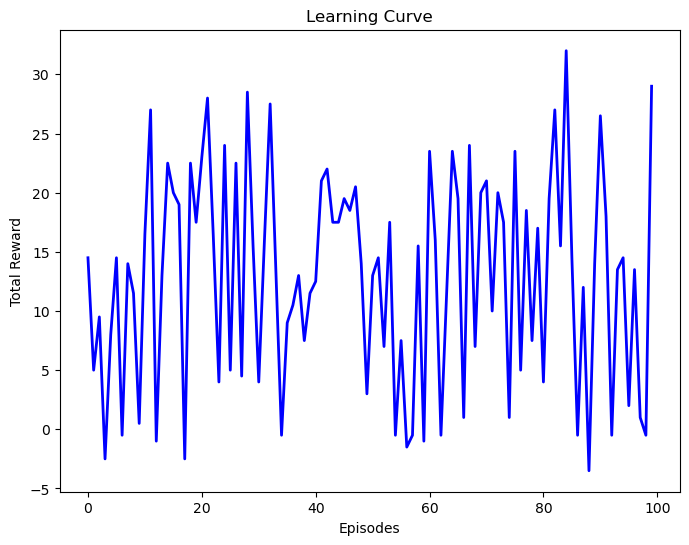

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_true_labels = pd.cut([score for score in y_scores_after], bins=[-np.inf, 0.5, 1.5, np.inf], labels=labels)
y_pred_labels = pd.cut([score for score in y_scores_after], bins=[-np.inf, 0.5, 1.5, np.inf], labels=labels)

y_true_labels = y_true_labels[:len(y_pred_labels)]

y_binarized_test = label_binarize(y_true_labels, classes=labels)
y_binarized_scores = label_binarize(y_pred_labels, classes=labels)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

n_classes = y_binarized_test.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized_test[:, i], y_binarized_scores[:, i])
    roc_auc[i] = roc_auc_score(y_binarized_test[:, i], y_binarized_scores[:, i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(len(all_rewards_after)), all_rewards_after, color='blue', lw=2)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Learning Curve')
plt.show()
